# Plots

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

greece1 = "#1C8DAD"
greece2 = "#2F496E"
greece3 = "#ED8C72"

titleColor = greece2
scatterColor = greece1
distColor = greece3
lineColor = greece2

In [2]:
data = pd.read_csv('../Data/data.csv')

noise = pd.read_csv('../Data/by group/Noise.csv')
actual = pd.read_csv('../Data/by group/Actual.csv')
simple = pd.read_csv('../Data/by group/Simple.csv')
exotic = pd.read_csv('../Data/by group/Exotic.csv')
new = pd.read_csv('../Data/by group/New.csv')
color = pd.read_csv('../Data/by group/Color.csv')


GaussianNoise = pd.read_csv('../Data/by distortion/distortion1.csv')
GaussianBlur = pd.read_csv('../Data/by distortion/distortion8.csv')
JPEG = pd.read_csv('../Data/by distortion/distortion10.csv')
JPEG2000 = pd.read_csv('../Data/by distortion/distortion11.csv')

common_dist = pd.concat([GaussianNoise, GaussianBlur, JPEG, JPEG2000])

common_dist['distortion'].replace({1.00000 : 'Additive Gaussian Noise (#1)', 
                                  8.00000 : 'Gaussian Blur (#8)',
                                  10.00000 : 'JPEG compression (#10)',
                                  11.00000 : 'JPEG2000 compression (#11)'}, inplace=True)

#### MOS distribution

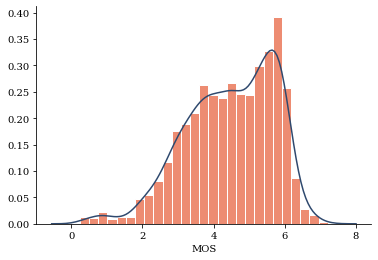

In [3]:
sns_plot=sns.distplot(data['MOS'], color=lineColor, hist_kws={"color":distColor, "alpha":1, "edgecolor":"w"})

sns.despine()

hist = sns_plot.get_figure()
hist.savefig("MOS_hist.png",bbox_inches='tight')

### Scatterplots

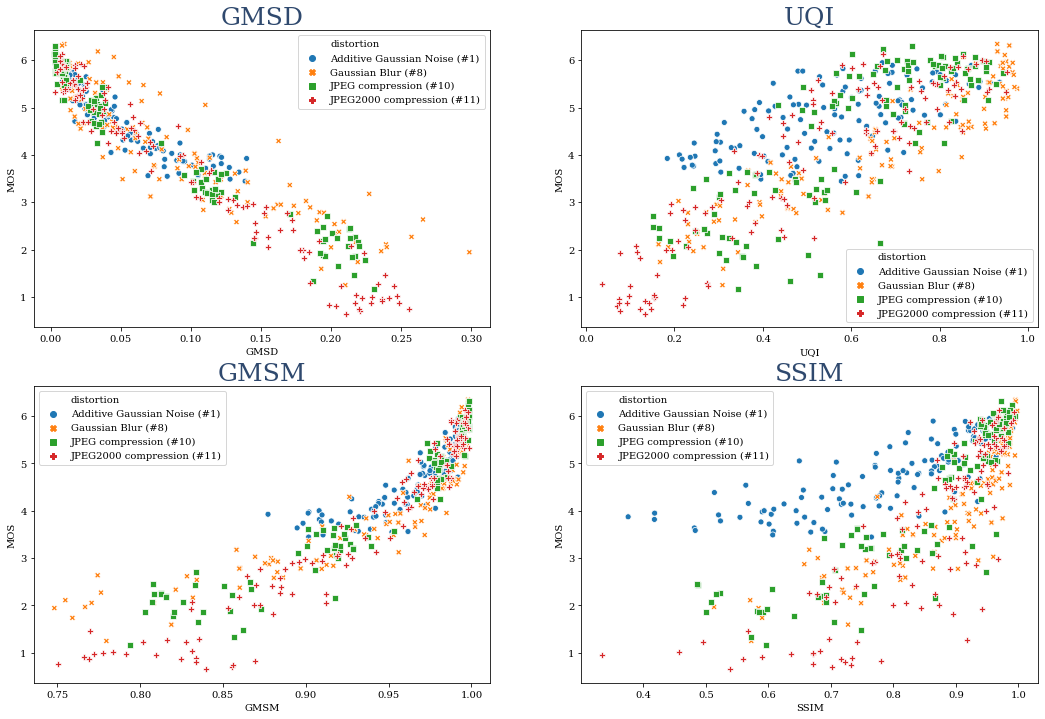

In [4]:
fig, axs = plt.subplots(figsize=(18, 12), nrows=2, ncols=2)

# The amount of space above titles
y_title_margin = 1.0

sns.scatterplot(x="GMSD", y="MOS", hue="distortion", style="distortion", data=common_dist, color=scatterColor, ax=axs[0, 0])
sns.scatterplot(x="GMSM", y="MOS", hue="distortion", style="distortion", data=common_dist, color=scatterColor, ax=axs[1, 0])

sns.scatterplot(x="UQI", y="MOS", hue="distortion", style="distortion", data=common_dist, color=scatterColor, ax=axs[0, 1])
sns.scatterplot(x="SSIM", y="MOS", hue="distortion", style="distortion", data=common_dist, color=scatterColor, ax=axs[1, 1])

axs[0, 0].set_title("GMSD", y = y_title_margin, color=titleColor, fontsize=25)
axs[1, 0].set_title("GMSM", y = y_title_margin, color=titleColor, fontsize=25)

axs[0, 1].set_title("UQI", y = y_title_margin, color=titleColor, fontsize=25)
axs[1, 1].set_title("SSIM", y = y_title_margin, color=titleColor, fontsize=25)


fig.savefig("scatterplots.png", bbox_inches='tight')

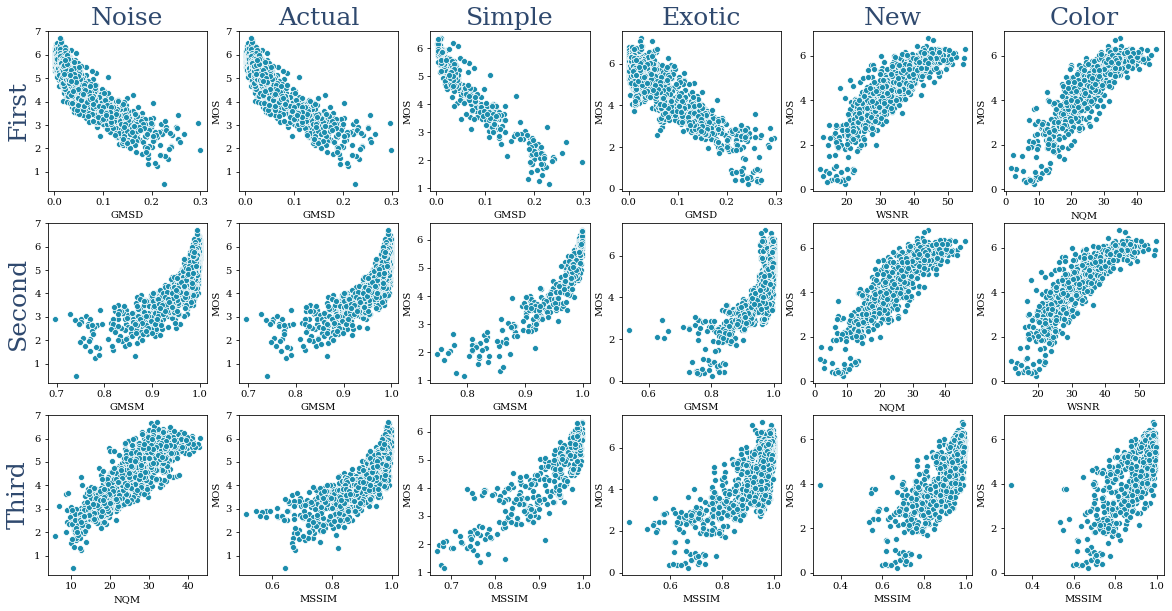

In [5]:
fig, axs = plt.subplots(figsize=(20, 10), nrows=3, ncols=6)

axs[0][0].set_title("Noise", y = y_title_margin, color=titleColor, fontsize=25)
axs[0][1].set_title("Actual", y = y_title_margin, color=titleColor, fontsize=25)
axs[0][2].set_title("Simple", y = y_title_margin, color=titleColor, fontsize=25)

axs[0][3].set_title("Exotic", y = y_title_margin, color=titleColor, fontsize=25)
axs[0][4].set_title("New", y = y_title_margin, color=titleColor, fontsize=25)
axs[0][5].set_title("Color", y = y_title_margin, color=titleColor, fontsize=25)

sns.scatterplot(x="GMSD", y="MOS", data=noise, color=scatterColor, ax=axs[0,0])
axs[0,0].set_ylabel('First', color=titleColor, fontsize=25)

sns.scatterplot(x="GMSM", y="MOS", data=noise, color=scatterColor, ax=axs[1,0])
axs[1,0].set_ylabel('Second', color=titleColor, fontsize=25)

sns.scatterplot(x="NQM", y="MOS", data=noise, color=scatterColor, ax=axs[2,0])
axs[2,0].set_ylabel('Third', color=titleColor, fontsize=25)

sns.scatterplot(x="GMSD", y="MOS", data=actual, color=scatterColor, ax=axs[0,1])
sns.scatterplot(x="GMSM", y="MOS", data=actual, color=scatterColor, ax=axs[1,1])
sns.scatterplot(x="MSSIM", y="MOS", data=actual, color=scatterColor, ax=axs[2,1])

sns.scatterplot(x="GMSD", y="MOS", data=simple, color=scatterColor, ax=axs[0,2])
sns.scatterplot(x="GMSM", y="MOS", data=simple, color=scatterColor, ax=axs[1,2])
sns.scatterplot(x="MSSIM", y="MOS", data=simple, color=scatterColor, ax=axs[2,2])

sns.scatterplot(x="GMSD", y="MOS", data=exotic, color=scatterColor, ax=axs[0,3])
sns.scatterplot(x="GMSM", y="MOS", data=exotic, color=scatterColor, ax=axs[1,3])
sns.scatterplot(x="MSSIM", y="MOS", data=exotic, color=scatterColor, ax=axs[2,3])

sns.scatterplot(x="WSNR", y="MOS", data=new, color=scatterColor, ax=axs[0,4])
sns.scatterplot(x="NQM", y="MOS", data=new, color=scatterColor, ax=axs[1,4])
sns.scatterplot(x="MSSIM", y="MOS", data=new, color=scatterColor, ax=axs[2,4])

sns.scatterplot(x="NQM", y="MOS", data=color, color=scatterColor, ax=axs[0,5])
sns.scatterplot(x="WSNR", y="MOS", data=color, color=scatterColor, ax=axs[1,5])
sns.scatterplot(x="MSSIM", y="MOS", data=color, color=scatterColor, ax=axs[2,5])


fig.savefig("scatterplots2.png", bbox_inches='tight')